In [1]:
import random

import scanpy as sc
import anndata as an
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

/Users/adr/miniconda3/envs/CAR_env2/lib/python3.10/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [2]:
random.seed(1234)

In [ ]:
data_path = "/path/to/data/"
geneset_path = "/path/to/genesets/"

In [3]:
adata = sc.read_h5ad(f"{data_path}20240229_from_rocio_for_manuscript.h5ad")


In [4]:
adata.layers["raw"] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)

In [5]:
nanana_adata = adata[adata.obs["CAR_Variant"]=="NA-NA-NA", :]
hvg = []
expr_by_all_genes = set(adata.var_names.tolist())
for car in adata.obs['CAR_Variant'].unique():
    if car==["NA-NA-NA", "NA-NA-z"]:
        continue
    print(car)
    car_adata = adata[adata.obs['CAR_Variant']==car]

    # Random genes
    car_adata2 = car_adata.copy()
    sc.pp.filter_genes(car_adata2, min_cells=1)
    expr_genes = car_adata2.var_names.tolist()
    expr_by_all_genes = expr_by_all_genes.intersection(expr_genes)
    
    # Highly variable genes
    adata2 = an.concat([car_adata, nanana_adata])
    sc.pp.highly_variable_genes(adata2, layer="raw", flavor="seurat_v3", n_top_genes=100, subset=True)
    hvg_100_genes = adata2.var_names.tolist()
    hvg = hvg+list(hvg_100_genes)

41BB-41BB-z
41BB-CD28-z
41BB-CD40-z
41BB-CTLA4-z
41BB-IL15RA-z
41BB-NA-z
CD28-41BB-z
CD28-CD28-z
CD28-CD40-z
CD28-CTLA4-z
CD28-IL15RA-z
CD28-NA-z
CD40-41BB-z
CD40-CD28-z
CD40-CD40-z
CD40-CTLA4-z
CD40-IL15RA-z
CD40-NA-z
CTLA4-41BB-z
CTLA4-CD28-z
CTLA4-CD40-z
CTLA4-CTLA4-z
CTLA4-IL15RA-z
CTLA4-NA-z
IL15RA-41BB-z
IL15RA-CD28-z
IL15RA-CD40-z
IL15RA-CTLA4-z
IL15RA-IL15RA-z
IL15RA-NA-z
NA-NA-NA


/Users/adr/miniconda3/envs/CAR_env2/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/adr/miniconda3/envs/CAR_env2/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


NA-NA-z


# Highly variable genes

In [6]:
hvg_counts = pd.DataFrame.from_dict(Counter(hvg), orient="index").reset_index().rename(columns={0: "count", "index":"gene"})

In [7]:
hvg_counts.sort_values("count", ascending=False).reset_index(drop=True).iloc[:82, :]

,gene,count
0,TNFRSF4,32
1,CCL1,32
2,IL3,32
3,CSF2,32
4,IL5,32
...,...,...
77,TNFRSF9,23
78,OSM,22
79,HIST1H3G,22
80,IL23A,22


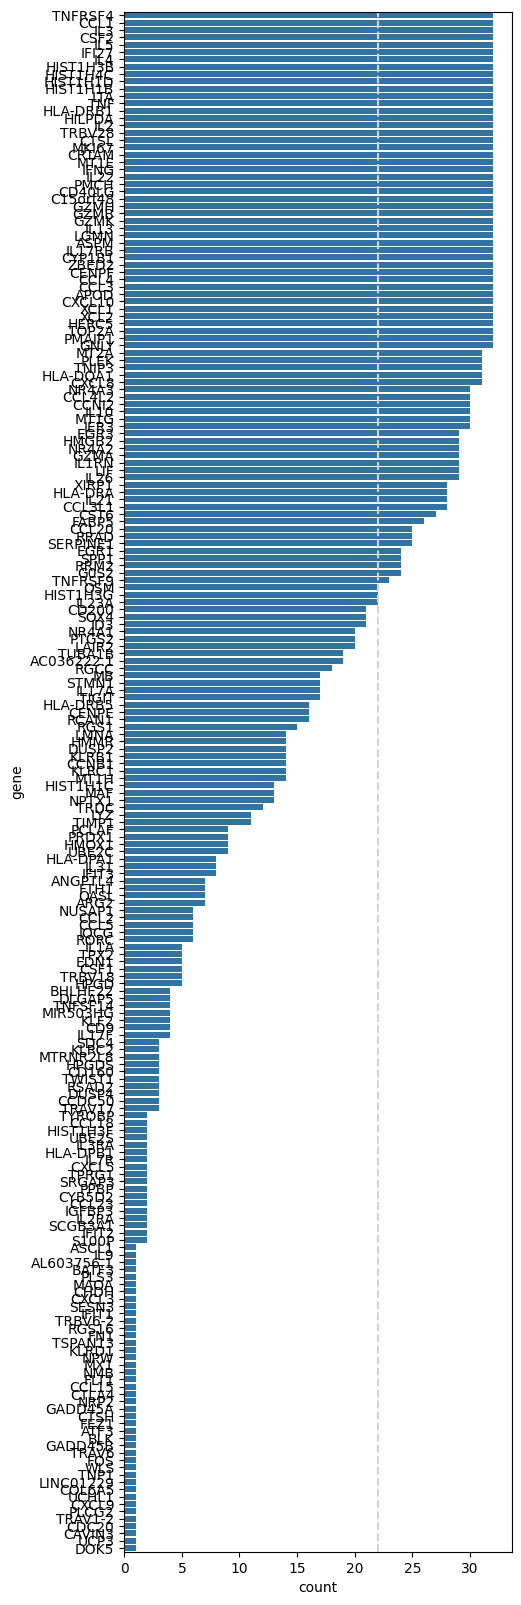

In [8]:
plt.figure(figsize=(5,20))
sns.barplot(hvg_counts.sort_values("count", ascending=False), y="gene", x="count")
plt.axvline(x=22, color="lightgrey", linestyle="--")

In [9]:
sel = hvg_counts[hvg_counts["count"]>=22].sort_values("count", ascending=False).reset_index(drop=True)
sel

,gene,count
0,TNFRSF4,32
1,MKI67,32
2,C15orf48,32
3,IL3,32
4,CSF2,32
...,...,...
76,SPP1,24
77,TNFRSF9,23
78,IL23A,22
79,HIST1H3G,22


In [10]:
sel["gene"].to_csv(f"{geneset_path}hvg_all_cars.txt", index=False, header=False, sep="\n")

# Random genes

In [11]:
random_genes = random.choices(list(expr_by_all_genes), k=82)

In [13]:
with open(f'{geneset_path}random_all_cars.txt', 'w') as f:
    for gene in random_genes:
        f.write(f"{gene}\n")